In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('stroke.csv')


In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.shape


(5110, 12)

In [5]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

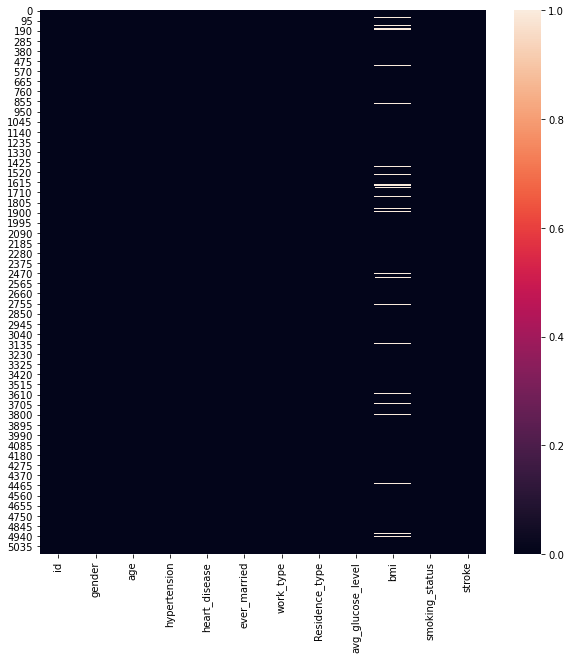

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()



In [7]:
df.isnull().sum() ### which shows which has the nul values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### imbalanced 

In [8]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [9]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

### for categorical handling

In [11]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [12]:
cat_colm= df[['gender','ever_married','work_type','Residence_type','smoking_status',]]

In [13]:
for i in cat_colm:
    lb=LabelEncoder()
    df[i]=lb.fit_transform(df[i])

In [14]:
df.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

### ploting the hist for  bmi 

In [15]:
df['bmi'].max()

97.6

In [16]:
df['bmi'].min()

10.3

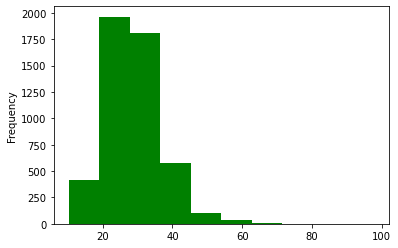

In [17]:
df['bmi'].plot(kind='hist',color='g')

In [18]:
df['bmi'].mean()

28.893236911794673

In [19]:
df['bmi'].fillna(value=28.89,inplace=True)

In [20]:
df.shape

(5110, 12)

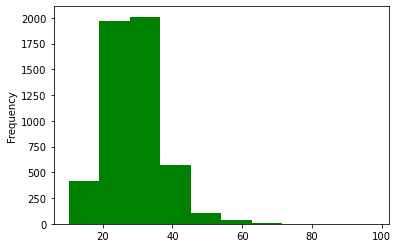

In [21]:
df['bmi'].plot(kind='hist',color='g')

### cleaned data 

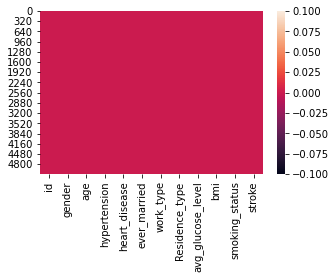

In [22]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())
plt.show()


### assigning the values to the x & y for training and testing

In [23]:
x=df.drop('stroke',axis=1).values
y=df['stroke'].values

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
std=StandardScaler()
x=std.fit_transform(x) ####doubt

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [28]:
x_train.shape

(4088, 11)

### this is a binary classification so we r using logicstic regression 

In [29]:
from sklearn.linear_model import LogisticRegression 

In [30]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

### accuracy_score

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
accuracy_score(y_train,lr.predict(x_train))

0.7323874755381604

In [33]:
accuracy_score(y_test,y_pred)

0.7142857142857143

### confusion_matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[692, 284],
       [  8,  38]], dtype=int64)

### identifying the best features for the accuracy 

In [35]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.003009,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026113,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325936,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160181,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038891,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335702,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000121,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168744,0.063437,0.131945
bmi,0.003009,-0.026113,0.325936,0.160181,0.038891,0.335702,-0.299448,-0.000121,0.168744,1.000000,0.219148,0.038935


In [36]:
# lets drop id need of it 

In [37]:
df.drop('id',axis=1,inplace=True)

In [38]:
df.shape

(5110, 11)

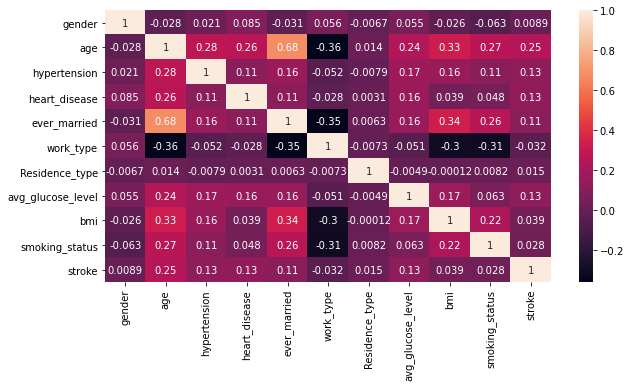

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
df.corr()['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
ever_married         0.108340
bmi                  0.038935
smoking_status       0.028123
Residence_type       0.015458
gender               0.008929
work_type           -0.032316
Name: stroke, dtype: float64

In [41]:
feature=df[['age','hypertension','heart_disease','avg_glucose_level','stroke']]
feature.shape

(5110, 5)

In [42]:
x=df.drop('stroke',axis=1)
y=df['stroke']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [45]:
lr_f=LogisticRegression(class_weight='balanced')
lr_f.fit(x_train,y_train)
y_pred_f=lr_f.predict(x_test)

C:\Users\Kaveen MP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
accuracy_score(y_test,y_pred_f)

0.7188519243313763

In [47]:
accuracy_score(y_train,lr_f.predict(x_train))

0.7313391109868606

In [49]:
confusion_matrix(y_test,y_pred_f)

array([[1043,  421],
       [  10,   59]], dtype=int64)